<a href="https://colab.research.google.com/github/Mashaell22/repot5/blob/main/mini_project_W5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RNN Introduction**


## Importing required libraries


In [ ]:
!pip install mplfinance

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import math
import random
import datetime as dt
import matplotlib.dates as mdates

import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense

## Loading and preprocessing the data
### Dataset 4-Deep learning/5-Time Series Forecasting (RNN)/LAB/ٌDatasets/traffic.csv

In [ ]:
dataset = pd.read_csv("/content/traffic.csv", parse_dates=['DateTime'],)
dataset.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [ ]:
dataset = pd.read_csv("/content/traffic.csv", parse_dates=['DateTime'])

In [ ]:
# Filter the data to include only Junction 1
filtered_data = dataset[dataset['Junction'] == 1]

# Convert the time data to just the date
filtered_data['Date'] = filtered_data['DateTime'].dt.date

# Filter the data for the morning period (from 6 AM to 12 PM) and aggregate based on the date
morning = filtered_data[(filtered_data['DateTime'].dt.hour >= 6) & (filtered_data['DateTime'].dt.hour < 12)].groupby('Date')['Vehicles'].sum()

# Prepare the X and Y data using a rolling window
window_size = 20
X = []
Y = []
morning_values = morning.values

for i in range(len(morning_values) - window_size):
    X.append(morning_values[i:i+window_size])
    Y.append(morning_values[i+window_size])

X = np.array(X)
Y = np.array(Y)

# Convert the Series to a DataFrame
morning_df = morning.reset_index()

# Rename the columns for clarity
morning_df.columns = ['Date', 'Vehicles']

# Convert the Date column to datetime type
morning_df['Date'] = pd.to_datetime(morning_df['Date'])

# Display the information of the new DataFrame after conversion
print(morning_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      608 non-null    datetime64[ns]
 1   Vehicles  608 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 9.6 KB
None


In [ ]:
# Filter the data for the morning period (from 6 AM to 12 PM) and aggregate based on the date
morning = filtered_data[(filtered_data['DateTime'].dt.hour >= 6) & (filtered_data['DateTime'].dt.hour < 12)].groupby('Date')['Vehicles'].sum()

## Visualization

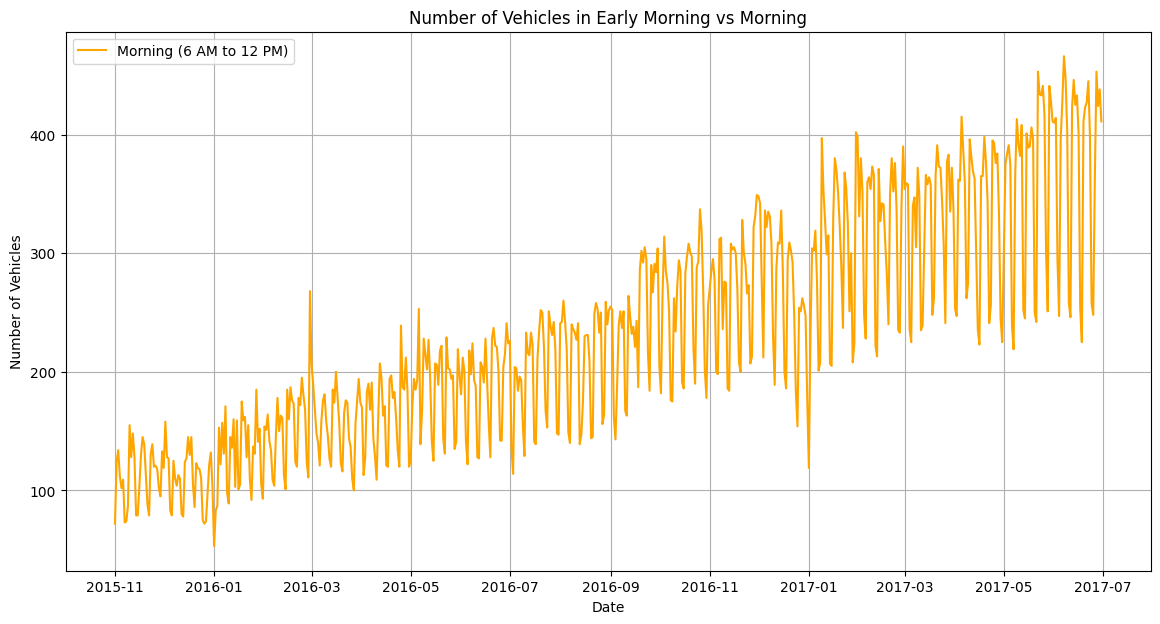

In [ ]:
# Visualization of Early Morning Data
plt.figure(figsize=(14, 7))
plt.plot(morning_df['Date'], morning_df['Vehicles'], label='Morning (6 AM to 12 PM)', color='orange')
plt.xlabel('Date')
plt.ylabel('Number of Vehicles')
plt.title('Number of Vehicles in Early Morning vs Morning')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#we can see Traffic increases significantly after 6 AM.
#The early morning period is less congested but follows a similar upward trend as the morning period

## Split the data into train and test

In [ ]:
# Convert the 'Date' column to numbers or encoded dates if necessary
X = morning_df['Date'].values.reshape(-1, 1)
y = morning_df['Vehicles'].values.reshape(-1, 1)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y)

#Split the data into training and testing sets
# 70% of the data for training, 30% for testing, without shuffling
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.3, random_state=42, shuffle=False)


## Modeling


In [ ]:
# Convert the 'Date' column to ordinal numbers (days since 01-01-0001)
X = morning_df['Date'].apply(lambda date: date.toordinal()).values.reshape(-1, 1)
y = morning_df['Vehicles'].values.reshape(-1, 1)

#Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.3, random_state=42, shuffle=False)

#Reshape the input data to be compatible with RNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
 #Build the RNN model
# Initialize a sequential model
model = Sequential()

# First RNN layer with 50 units, input shape, and return sequences
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Second RNN layer with 50 units and return sequences
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Third RNN layer with 50 units
model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))

# Add a dense output layer with one unit
model.add(Dense(units=1))

# Display the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 1, 50)               │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 1, 50)               │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,751 (49.81 KB)

 Trainable params: 12,751 (49.81 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
 # Compile the model
model.compile(optimizer='adam', loss='mse')

In [ ]:
 # Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.9603
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3704  
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2945 
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2224 
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1836 
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2127
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1871
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1431
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1405
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1667
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1355
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1318
Epoch 13/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1198 
Epoch 14/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1121 
Epoch 15/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.11

In [ ]:
 # Evaluate the model on the test data
model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1137  


0.14126992225646973

In [ ]:
from tensorflow.keras.layers import SimpleRNN

# Build the RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_rnn.add(Dropout(0.2))
model_rnn.add(SimpleRNN(units=50, return_sequences=True))
model_rnn.add(Dropout(0.2))
model_rnn.add(SimpleRNN(units=50))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(units=1))

# Compile the RNN model
model_rnn.compile(optimizer='adam', loss='mse')

# Train the RNN model
model_rnn.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.3660
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2708
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1768
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1370
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1452
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1249
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1068
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1001
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0832
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0912
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0892
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0845
Epoch 13/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0910
Epoch 14/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0818
Epoch 15/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0727
Epoc

In [ ]:
# Generate predictions for the training and test sets
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions to bring them back to the original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
# Calculate RMSE for training data
train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
print(f"Training RMSE: {train_rmse}")

# Calculate RMSE for test data
test_rmse = math.sqrt(mean_squared_error(y_test, test_predict))
print(f"Test RMSE: {test_rmse}")


Training RMSE: 196.54056414995318
Test RMSE: 196.18957174955526


**LSTM model**

In [ ]:
from tensorflow.keras.layers import LSTM

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50, return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=1))
# Display the model summary
model.summary()
# Compile the LSTM model
model_lstm.compile(optimizer='adam', loss='mse')

# Train the LSTM model
model_lstm.fit(X_train, y_train, epochs=100, batch_size=32)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 1, 50)               │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 1, 50)               │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,255 (149.44 KB)

 Trainable params: 12,751 (49.81 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,504 (99.63 KB)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.1244 
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0387 
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0326
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0300 
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0320 
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0269 
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0266 
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0263 
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0255 
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0270
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0286
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0260
Epoch 13/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0275 
Epoch 14/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0260 
Epoch 15/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0

**GRU model**

In [ ]:
from tensorflow.keras.layers import GRU

# Build the GRU model
model_gru = Sequential()
model_gru.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(units=50, return_sequences=True))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(units=50))
model_gru.add(Dropout(0.2))
model_gru.add(Dense(units=1))
# Display the model summary
model.summary()
# Compile the GRU model
model_gru.compile(optimizer='adam', loss='mse')

# Train the GRU model
model_gru.fit(X_train, y_train, epochs=100, batch_size=32)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 1, 50)               │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 1, 50)               │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,255 (149.44 KB)

 Trainable params: 12,751 (49.81 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,504 (99.63 KB)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0860
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0357
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0345 
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0326 
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0307
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0274 
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0282
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0316
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0297
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0271
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0329
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0288 
Epoch 13/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0272
Epoch 14/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0279
Epoch 15/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0255


In [ ]:
# Calculate RMSE for each model on the test data
rnn_rmse = math.sqrt(mean_squared_error(y_test, model_rnn.predict(X_test)))
lstm_rmse = math.sqrt(mean_squared_error(y_test, model_lstm.predict(X_test)))
gru_rmse = math.sqrt(mean_squared_error(y_test, model_gru.predict(X_test)))

print(f"RNN Test RMSE: {rnn_rmse}")
print(f"LSTM Test RMSE: {lstm_rmse}")
print(f"GRU Test RMSE: {gru_rmse}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step
RNN Test RMSE: 0.3686266322951507
LSTM Test RMSE: 0.3956400506436952
GRU Test RMSE: 0.39771989669976526


## Visualization of results


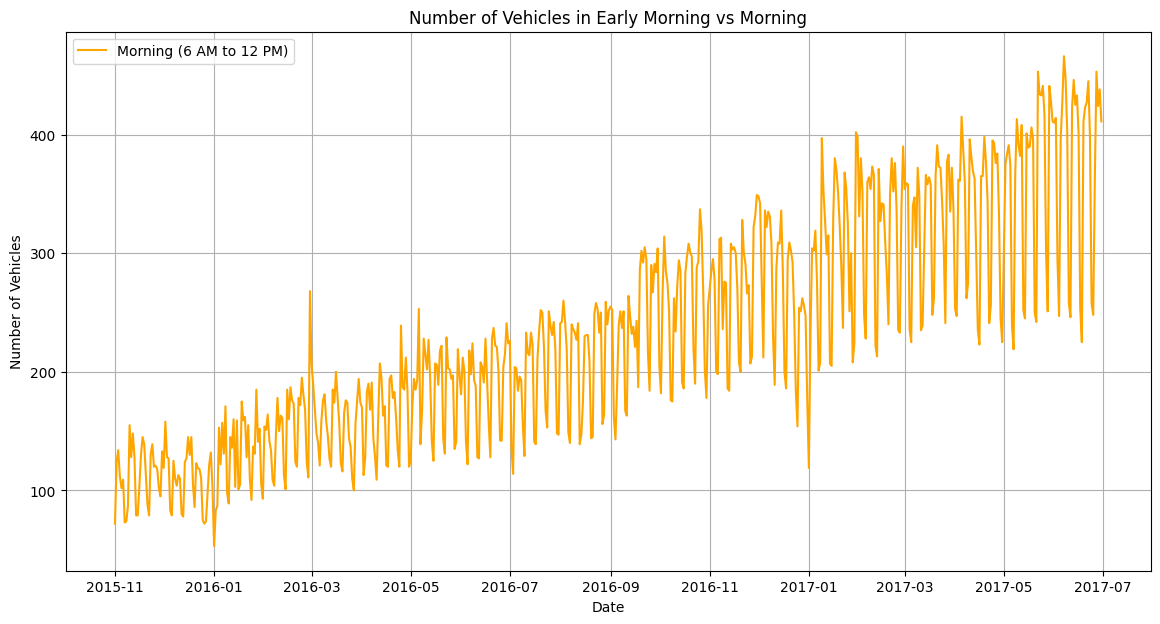

In [ ]:
# Visualization of Early Morning Data
plt.figure(figsize=(14, 7))
plt.plot(morning_df['Date'], morning_df['Vehicles'], label='Morning (6 AM to 12 PM)', color='orange')
plt.xlabel('Date')
plt.ylabel('Number of Vehicles')
plt.title('Number of Vehicles in Early Morning vs Morning')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

In [ ]:
morning_df

,Date,Vehicles
0,2015-11-01,72
1,2015-11-02,124
2,2015-11-03,134
3,2015-11-04,112
4,2015-11-05,102
...,...,...
603,2017-06-26,362
604,2017-06-27,453
605,2017-06-28,424
606,2017-06-29,438


In [ ]:
new_df = morning_df.reset_index()['Vehicles']

In [ ]:
new_df

,Vehicles
0,72
1,124
2,134
3,112
4,102
...,...
603,362
604,453
605,424
606,438


In [ ]:
# Normalizing our data using MinMaxScaler
scaler = MinMaxScaler()
scaled_data=scaler.fit_transform(np.array(new_df).reshape(-1,1))

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Split into training and testing sets
train_size = int(len(scaled_data) * 0.8)  # 80% for training
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [ ]:
# Define the sequence length (number of past time steps)
n_past = 20

# Prepare sequences for RNN
X_train, y_train = [], []
for i in range(n_past, len(train_data)):
    X_train.append(train_data[i - n_past:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Similarly prepare sequences for the test set
X_test, y_test = [], []
for i in range(n_past, len(test_data)):
    X_test.append(test_data[i - n_past:i, 0])
    y_test.append(test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
print("Training set size:-")
print(X_train.shape), print(y_train.shape)
print("\n")
print("Testing set size:-")
print(X_test.shape), print(y_test.shape)

Training set size:-
(466, 20, 1)
(466,)


Testing set size:-
(102, 20, 1)
(102,)


(None, None)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
train_predict = model_rnn.predict(X_train)
test_predict = model_rnn.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [ ]:
# Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
# Set the number of previous time steps to consider for plotting
look_back = 20

# Initialize an array for plotting the train predictions
trainPredictPlot = np.empty_like(new_df)
#trainPredictPlot[:] = np.nan
# Assign the predicted values to the appropriate location for train predictions
trainPredictPlot[look_back:len(train_predict)+look_back] = train_predict.flatten()

# Initialize an array for plotting the test predictions
testPredictPlot = np.empty_like(new_df)
#testPredictPlot[:] = np.nan
# Calculate the starting index for the test predictions
test_start = len(new_df) - len(test_predict)
# Assign the predicted values to the appropriate location for test predictions
testPredictPlot[test_start:] = test_predict.flatten()

# Rescale the scaled data back to its original scale using the scaler
original_scaled_data = scaler.inverse_transform(scaled_data)

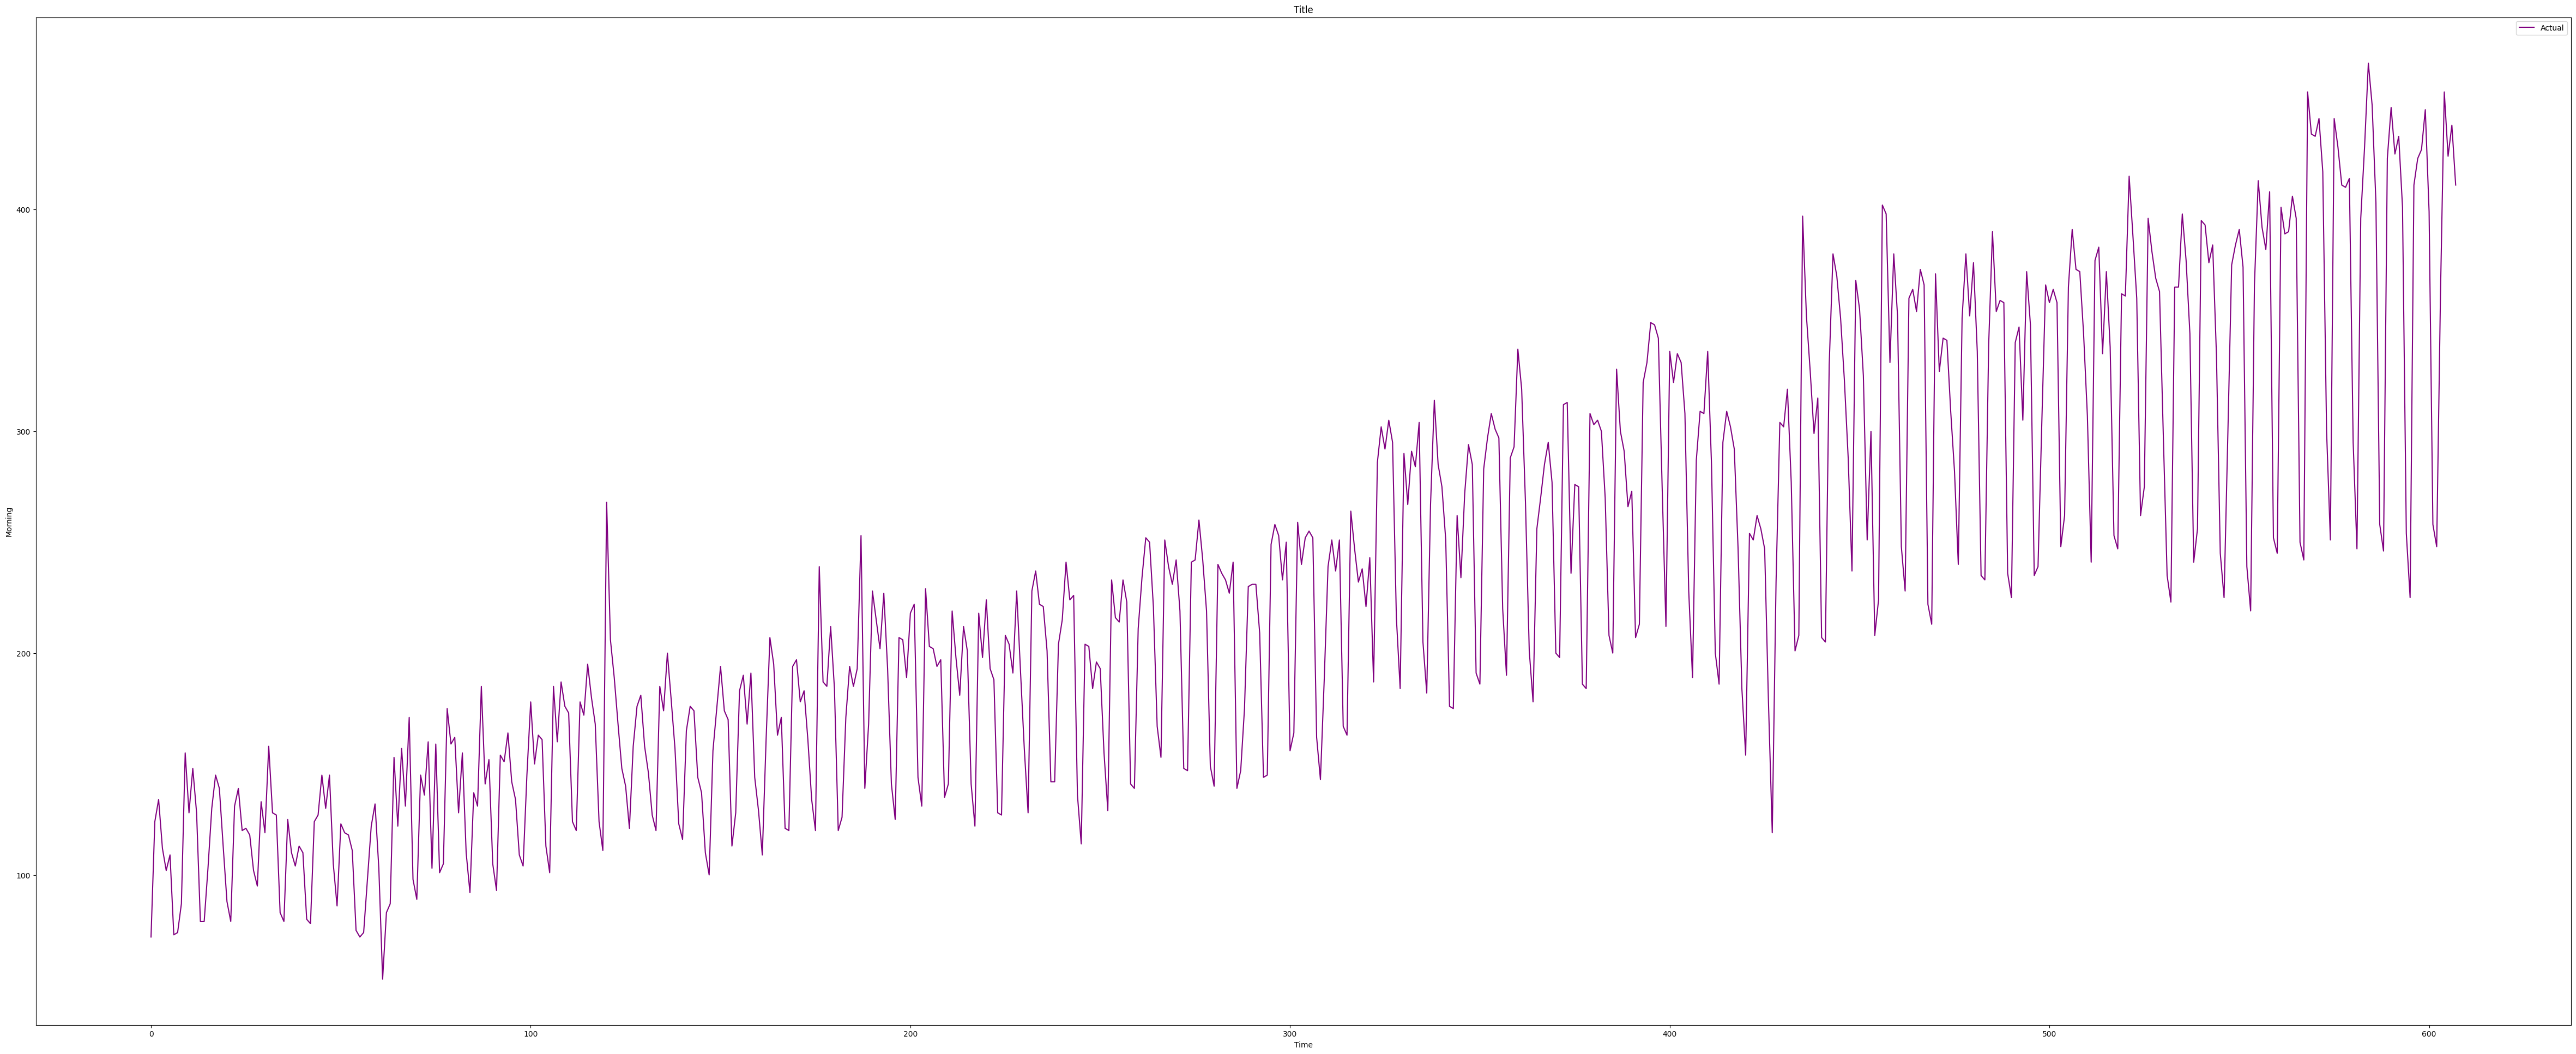

In [ ]:

# Plotting the baseline data, training predictions, and test predictions
plt.figure(figsize=(60, 24))
plt.plot(original_scaled_data, color='purple', label="Actual")
'''plt.plot(trainPredictPlot, color='pink', label=f"Predicted  price(train set)")
plt.plot(testPredictPlot, color='skyblue', label=f"Predicted price(test set)")'''
plt.title("Title")
plt.xlabel("Time")
plt.ylabel("Morning")
plt.legend()
plt.show()

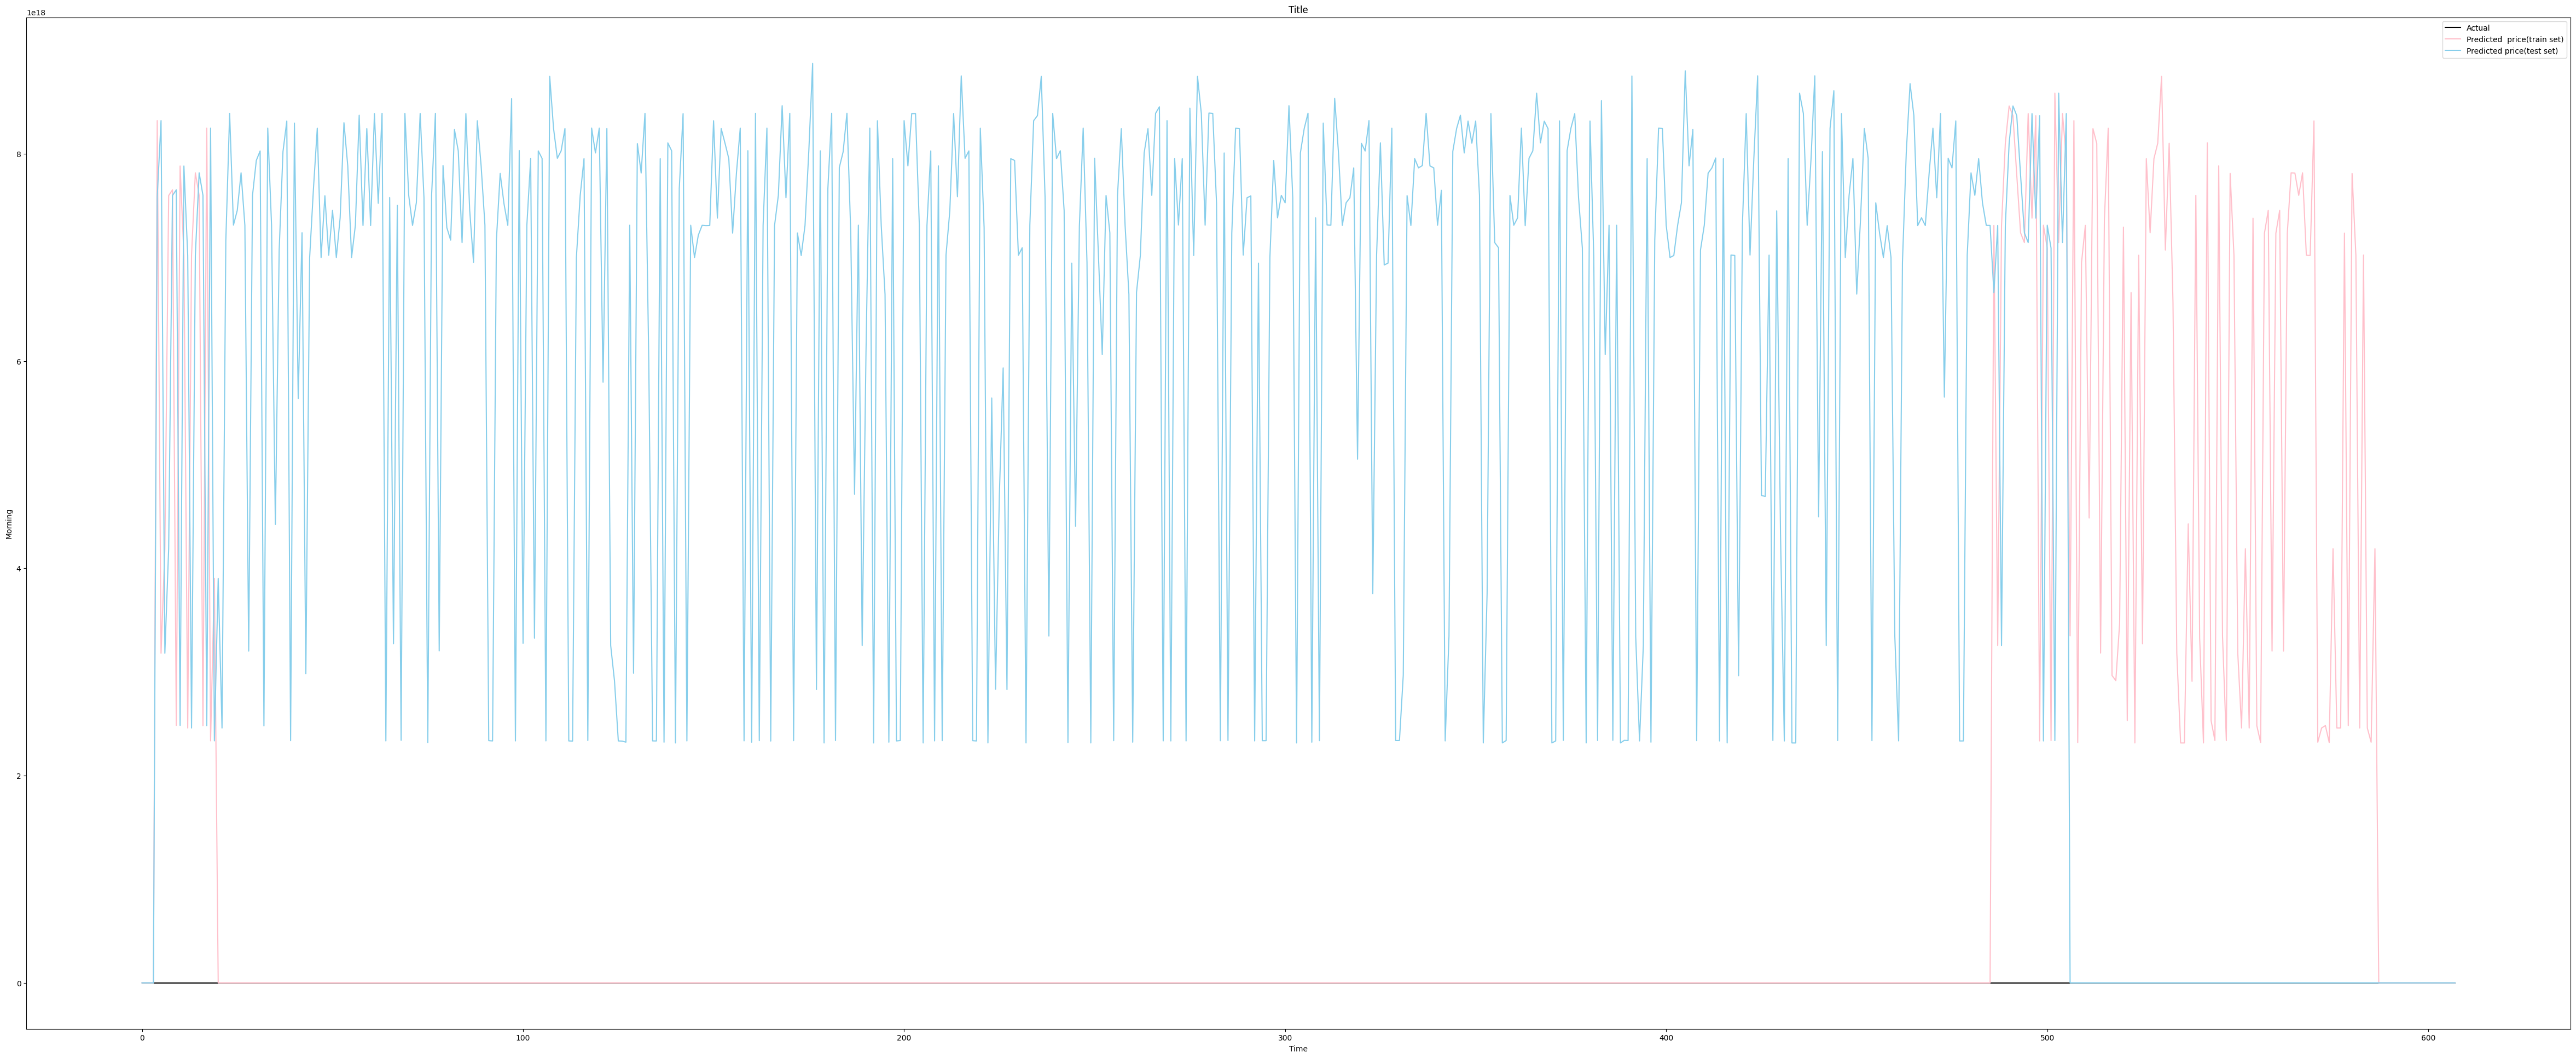

In [ ]:

# Plotting the baseline data, training predictions, and test predictions
plt.figure(figsize=(60, 24))
plt.plot(original_scaled_data, color='black', label="Actual")
plt.plot(trainPredictPlot, color='pink', label=f"Predicted  price(train set)")
plt.plot(testPredictPlot, color='skyblue', label=f"Predicted price(test set)")
plt.title("Title")
plt.xlabel("Time")
plt.ylabel("Morning")
plt.legend()
plt.show()

### this gragh prediction shows overfit which is correctin our model